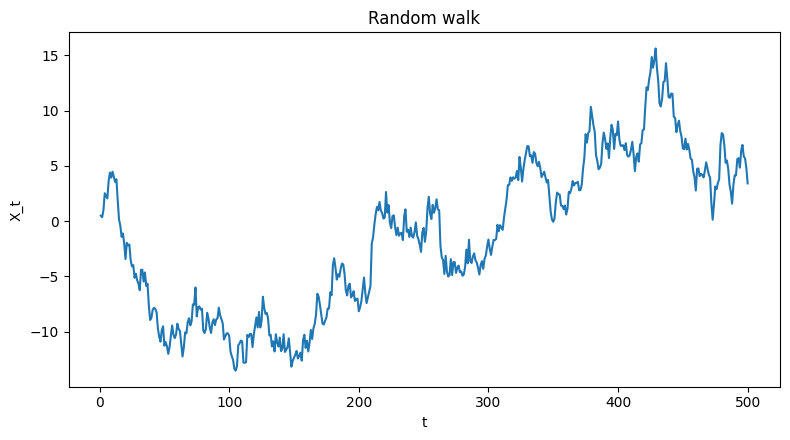

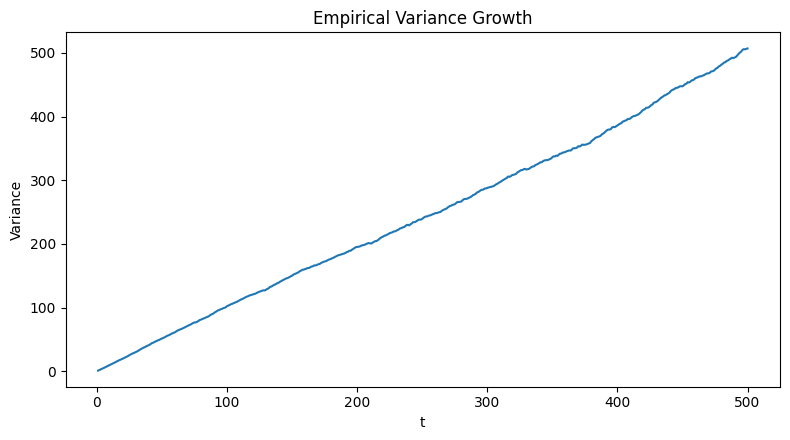

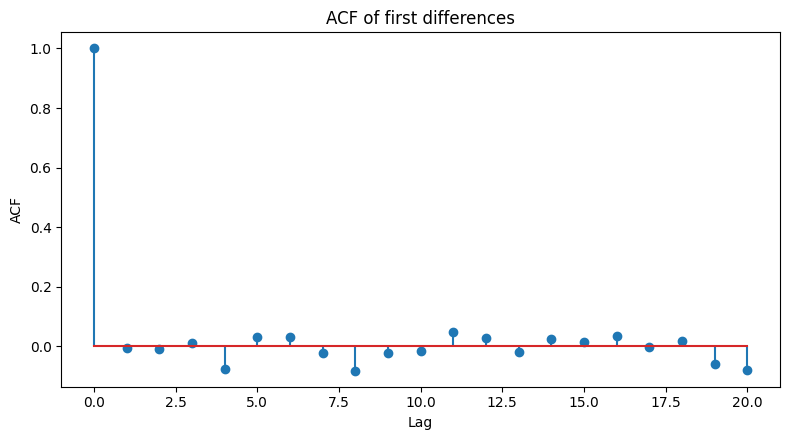

Quick numeric checks:
- Var[X_T] at T=500: empirical ≈ 506.89, theory = 500.00
- OLS slope of Var[X_t] on t (through origin): β ≈ 0.978 (should be ≈ σ^2 = 1.000)


In [12]:
# Demonstration: a random walk has a stochastic trend
#
# What this notebook shows:
# 1) Simulate X_t = sum_{i=1}^t eps_i, where eps_i ~ WN(0, sigma^2)
# 2) Verify non-stationarity by showing Var[X_t] grows ~ t * sigma^2
# 3) Verify stationarity of the first difference: ∇X_t = X_t - X_{t-1} = eps_t
#    by plotting its sample ACF (nearly 0 for lags > 0)

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

T = 500           # time points
N = 3000          # number of Monte Carlo paths for variance check
sigma = 1.0       # white-noise std

# --- Simulate white noise and random walks ---
eps = sigma * np.random.randn(N, T)         # shape (N, T)
X = np.cumsum(eps, axis=1)                  # random walk paths

# --- 1) Single-path illustration of the random walk ---
x1 = X[0]

plt.figure(figsize=(8, 4.5))
plt.plot(np.arange(1, T+1), x1, label="One simulated path of $X_t$")
plt.xlabel("t")
plt.ylabel("X_t")
plt.title("Random walk")
plt.tight_layout()
plt.savefig("./ATSSB_RandomWalkPath.png", dpi=160, transparent=True)
plt.show()

# --- 2) Var[X_t] grows linearly with t ---
t = np.arange(1, T+1)
var_t = X.var(axis=0, ddof=1)               # empirical variance across N paths
theory = t * (sigma**2)

# Estimate slope in Var[X_t] ≈ beta * t via OLS through origin
beta = (t @ var_t) / (t @ t)

plt.figure(figsize=(8, 4.5))
plt.plot(t, var_t, label="Empirical Var[$X_t$] across paths")
plt.xlabel("t")
plt.ylabel("Variance")
plt.title(f"Empirical Variance Growth")
plt.tight_layout()
plt.savefig("./ATSSB_RandomWalkVarianceGrowth.png", dpi=160, transparent=True)
plt.show()

# --- 3) First difference is white noise (stationary) ---
def acf(x, max_lag=20):
    x = np.asarray(x, dtype=float)
    x = x - x.mean()
    denom = np.dot(x, x)
    ac = [1.0]
    for k in range(1, max_lag+1):
        num = np.dot(x[:-k], x[k:])
        ac.append(num / denom if denom != 0 else np.nan)
    return np.array(ac)

dx = np.diff(x1)               # equals eps_t for that path
ac = acf(dx, max_lag=20)

plt.figure(figsize=(8, 4.5))
lags = np.arange(0, len(ac))
plt.stem(lags, ac)
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.title("ACF of first differences")
plt.tight_layout()
plt.savefig("./ATSSB_RandomWalkDiffACF.png", dpi=160, transparent=True)
plt.show()

# --- Print small numeric checks ---
print("Quick numeric checks:")
print(f"- Var[X_T] at T={T}: empirical ≈ {var_t[-1]:.2f}, theory = {T*sigma**2:.2f}")
print(f"- OLS slope of Var[X_t] on t (through origin): β ≈ {beta:.3f} (should be ≈ σ^2 = {sigma**2:.3f})")